# Non-negative data

Which of the following 2-dimensional arrays are examples of non-negative data?

1. A tf-idf word-frequency array.
2. An array daily stock market price movements (up and down), where each row represents a company.
3. An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product

- 1 and 3

# NMF applied to Wikipedia articles

you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [58]:
import pandas as pd
articles = pd.read_csv("dataset/wikipedia-vectors.csv",index_col=0)
print(articles.shape)
articles.head()

(13125, 60)


,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [59]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


[[0.01 0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.01 0.01]
 ...
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


In [60]:
print(nmf_features.shape)
titles = pd.read_csv("dataset/wikipedia-vocabulary-utf8.txt",header=None)
titles.columns = ["titles"]
print(titles.shape)
titles.head()

(13125, 6)
(13125, 1)


,titles
0,aaron
1,abandon
2,abandoned
3,abandoning
4,abandonment


In [56]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles["titles"].astype(str))



In [16]:
print(df.shape)
print(nmf_features.shape)

(13125, 13125)
(13125, 6)


# NMF features of the Wikipedia articles

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array `nmf_features` is available. Also available is a list titles giving the `title` of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [34]:
# Print the row for 'Anne Hathaway'
print(df.loc['abandoned'])

# Print the row for 'Denzel Washington'
print(df.loc['aaron'])

0    0.000000
1    0.006474
2    0.000000
3    0.003803
4    0.005214
5    0.009824
Name: abandoned, dtype: float64
0    0.007700
1    0.000000
2    0.000000
3    0.005163
4    0.000000
5    0.000156
Name: aaron, dtype: float64


# NMF reconstructs samples

you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are `[2, 1]`, then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample `[0.1203 0.1764 0.3195 0.141]`.

In [35]:
import numpy as np
X = np.array([[1.0,  0.5, 0.0 ],
 [0.2, 0.1, 2.1]])
A = np.array([2,1])
A.dot(X)

array([2.2, 1.1, 2.1])

# NMF learns topics of documents

you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as `model`, while `words` is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [36]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 60)
28    0.462589
26    0.459743
29    0.424210
20    0.416031
21    0.410170
Name: 3, dtype: float64


# Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array `samples`, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [41]:
samples = pd.read_csv("dataset/lcd-digits.csv")
samples.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


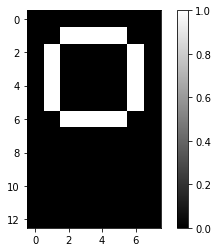

In [49]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples.iloc[0,:].values

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


# NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function `show_as_image()` that displays the image encoded by any 1D array:

In [45]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


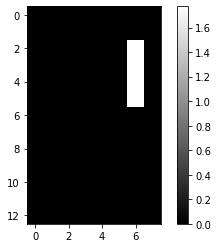

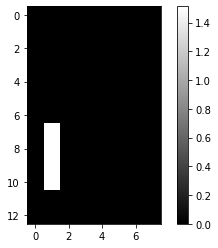

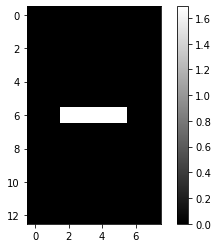

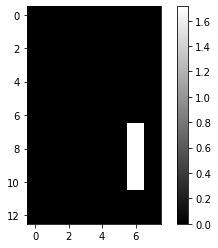

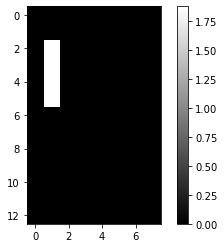

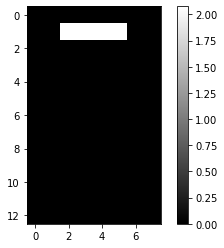

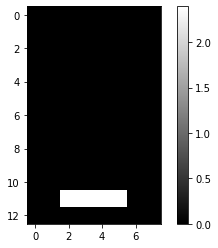

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [46]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

# PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array `samples`

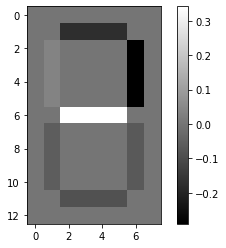

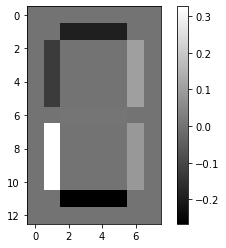

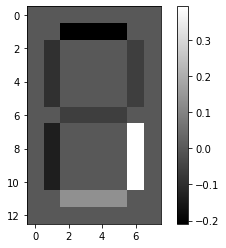

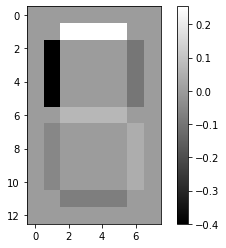

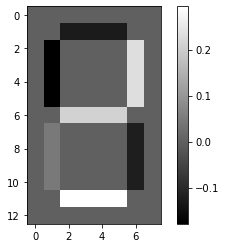

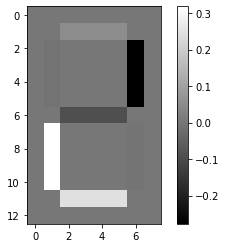

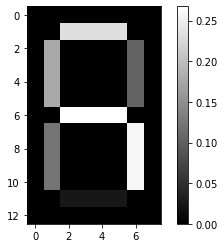

In [47]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

# Which articles are similar to 'Cristiano Ronaldo'?

you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.

In [63]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles["titles"].astype(str))

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['aaron']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

titles
aaron     1.000000
bowl      0.999811
friday    0.999767
wonder    0.999710
moore     0.999707
dtype: float64


# Recommend musical artists part I

 you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array `artists` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, `MaxAbsScaler`, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [72]:
artists_df = pd.read_csv("dataset/artists.csv",header=None)
artists_df.columns = ["artist"]
artists_df.head()

,artist
0,Massive Attack
1,Sublime
2,Beastie Boys
3,Neil Young
4,Dead Kennedys


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer

# Assuming 'artists' is your DataFrame with the 'artist' column
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply TF-IDF vectorization to the 'artist' column
artist = vectorizer.fit_transform(artists_df['artist'])


In [74]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer , MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


# Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. 

In [76]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index= artists_df['artist'])

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest(9))

artist
Bruce Springsteen    1.000000
Eminem               1.000000
Less Than Jake       1.000000
Motörhead            1.000000
Barenaked Ladies     1.000000
Fiona Apple          1.000000
Keane                1.000000
Rilo Kiley           1.000000
Leonard Cohen        0.998908
dtype: float64
